# HSDC Winter '23 - PREMIER PROJECT

# Team Optuna

## Title: ROAD ACCIDENTS DUE TO DRIVER VIOLATIONS (INDIA)

### Workflow

![Data Science Workflow](img/ds-workflow.png)

<a id="0"></a> <br>
 # Table of Contents  
1. [Acquire](#1.-Acquire)     
1. [Prepare](#2.-Prepare) 
1. [Analyze](#3.-Analyze)
1. [Report](#4.-Report)  
1. [Actions](#5.-Actions)  

## 1. Acquire

### Problem Statement

Having one of the largest road networks in the world, the issue of road safety is critical in India. Fatality due to road accidents leads to lakhs of lives being lost annually. Chances of the numbers increasing rise by the day with the rising motorization and expanding road network. The data and analysis on road accidents contained herein will help create awareness, formulate suitable policy, take effective measures and also assist in informed decision making in the area of road safety in India.

### Objectives

- Visualizing regional trends of driver-related accidents to identify high-risk regions

- Visualizing the trends in states and union territories driver-related accidents to identify states and Union Territories

#### 1.1. Importing the required libraries

In [2]:
import pandas as pd
import opendatasets as od
import numpy as np
import plotly.express as px
import plotly.io as pio
import json
import missingno as msno

In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

#### 1.2. Downloading the data from [Kaggle](https://www.kaggle.com/datasets/thedevastator/state-ut-wise-road-accidents-due-to-driver-viola)

In [3]:
od.download("https://www.kaggle.com/datasets/thedevastator/state-ut-wise-road-accidents-due-to-driver-viola")

100%|██████████| 1.72k/1.72k [00:00<?, ?B/s]

## 2. Prepare

#### 2.1. Converting our .csv file to a pandas dataframe

In [4]:
data = pd.read_csv("response.csv")

#### 2.2. Inspecting our pandas dataframe

In [5]:
data.head()

,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


- The ***'.T'*** transposes the dataframe to enable us see all the columns in our dataframe

In [6]:
data.head().T

,0,1,2,3,4
index,0,1,2,3,4
sno,1,2,3,4,5
stateut,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh
region,south,northeast,northeast,north,centre
regionid,2,5,5,1,9
alcintake2014,594,11,613,1680,335
overspeed2014,12747.0,16.0,4596.0,1496.0,6720.0
overtaking2014,507,0,129,278,188
lanejumping2014,328,0,104,236,313
wrongside2014,668,0,156,308,266


#### 2.3. Checking for missing values

In [7]:
data.isna().sum()

index              0
sno                0
stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      1
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

- ***Visually*** representing the 1 missing value

<AxesSubplot:>

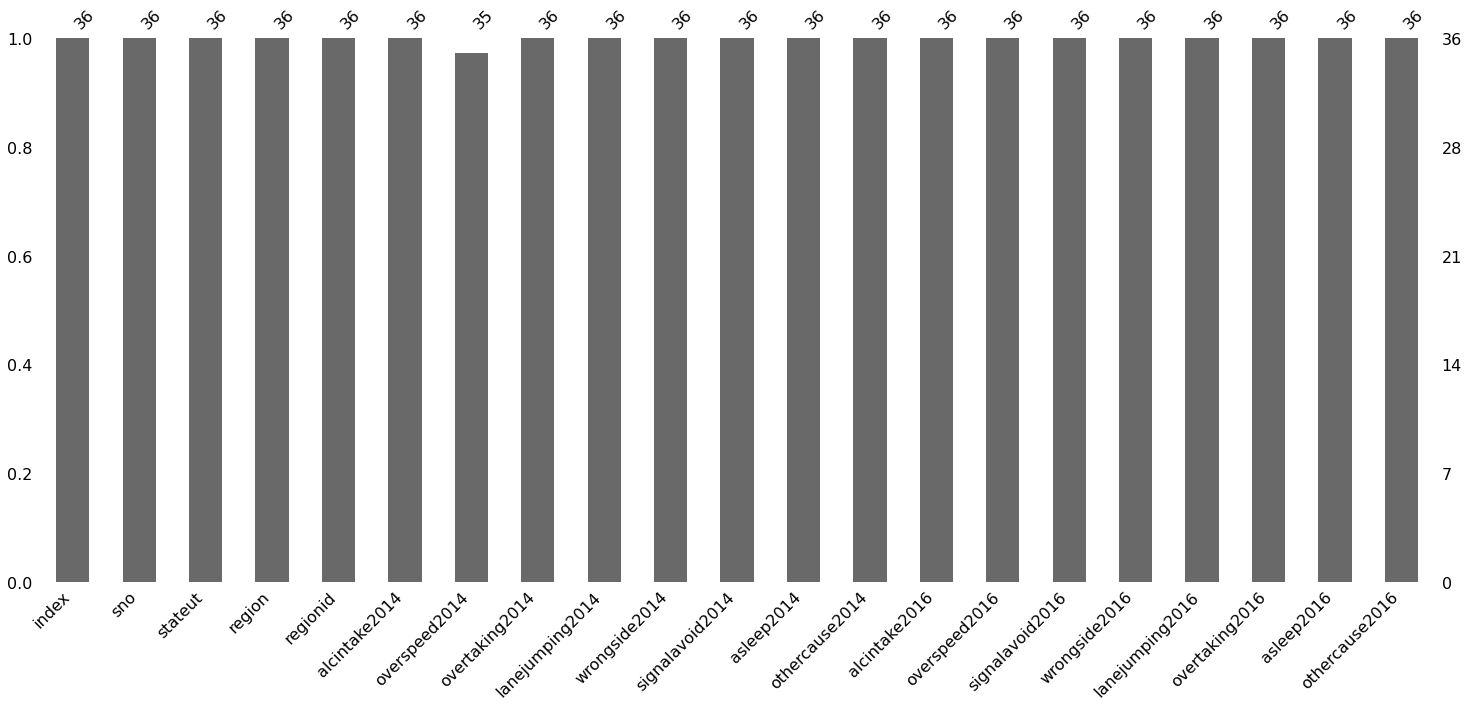

In [8]:
msno.bar(data)

#### 2.4. Imputing missing value with the mean

In [9]:
data["overspeed2014"] = data["overspeed2014"].fillna(data["overspeed2014"].mean())
data[["overspeed2014"]].tail(3)

,overspeed2014
33,5950.6
34,1.0
35,250.0


<AxesSubplot:>

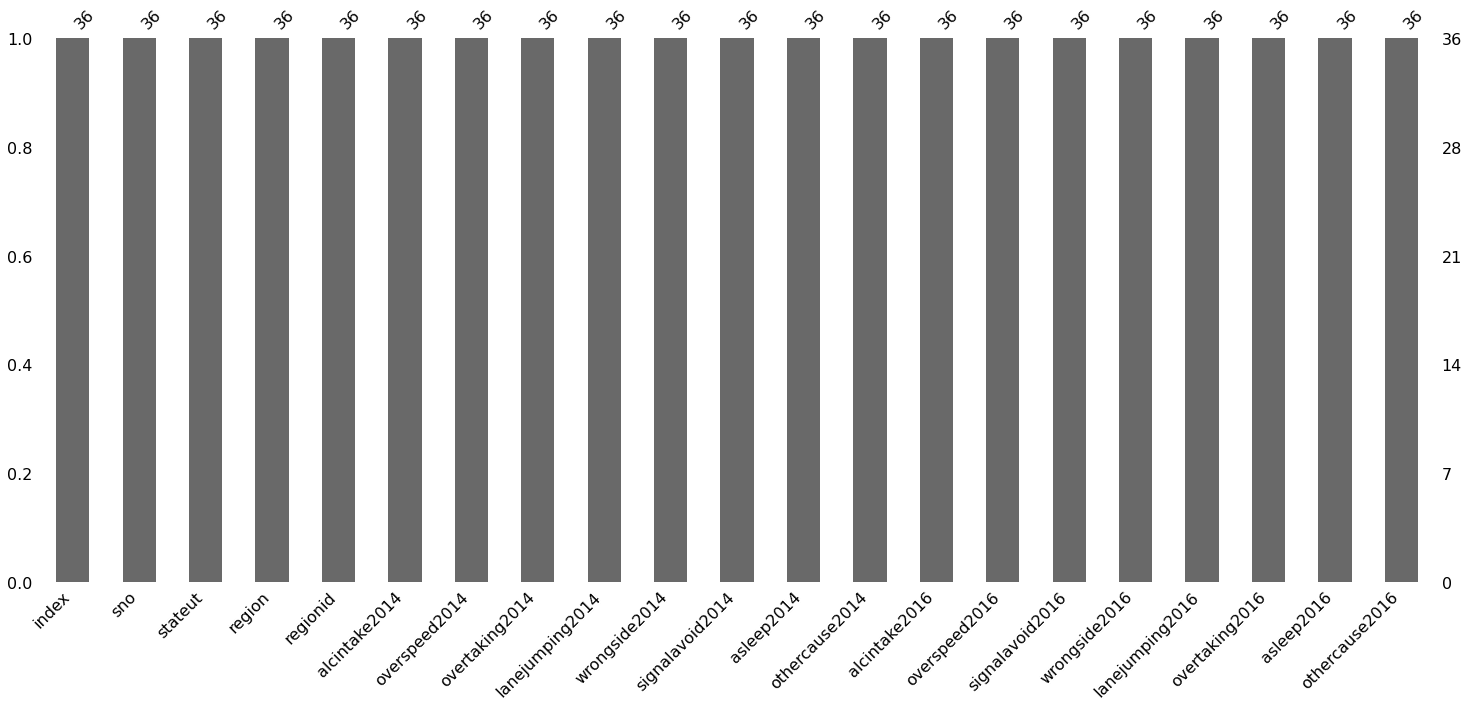

In [10]:
msno.bar(data)

#### 2.5. Dropping the index column

In [11]:
data = data.drop(["index"], axis=1)

In [12]:
data.head().T

,0,1,2,3,4
sno,1,2,3,4,5
stateut,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh
region,south,northeast,northeast,north,centre
regionid,2,5,5,1,9
alcintake2014,594,11,613,1680,335
overspeed2014,12747.0,16.0,4596.0,1496.0,6720.0
overtaking2014,507,0,129,278,188
lanejumping2014,328,0,104,236,313
wrongside2014,668,0,156,308,266
signalavoid2014,29,0,7,7,10


#### 2.6. Further inspection of our data

In [13]:
data.shape

(36, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sno              36 non-null     int64  
 1   stateut          36 non-null     object 
 2   region           36 non-null     object 
 3   regionid         36 non-null     int64  
 4   alcintake2014    36 non-null     int64  
 5   overspeed2014    36 non-null     float64
 6   overtaking2014   36 non-null     int64  
 7   lanejumping2014  36 non-null     int64  
 8   wrongside2014    36 non-null     int64  
 9   signalavoid2014  36 non-null     int64  
 10  asleep2014       36 non-null     int64  
 11  othercause2014   36 non-null     int64  
 12  alcintake2016    36 non-null     int64  
 13  overspeed2016    36 non-null     int64  
 14  signalavoid2016  36 non-null     int64  
 15  wrongside2016    36 non-null     int64  
 16  lanejumping2016  36 non-null     int64  
 17  overtaking2016   3

In [15]:
data["region"].nunique()

9

In [16]:
data["regionid"].nunique()

9

#### 2.7. Preprocessing the dataframe for the [Choropleth](https://plotly.com/python/choropleth-maps/) maps

- ***Loading*** our geojson file

In [17]:
india_states = json.load(open("india.geojson", "r"))

- ***Inspecting*** our geojson file

In [18]:
india_states["features"][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [19]:
india_states["features"][2]["properties"]

{'cartodb_id': 3, 'state_code': 28, 'st_nm': 'Andhra Pradesh'}

- A ***for loop*** that creates a dictionary ***state_id_map*** with the ***state name*** as the key and the ***state_code*** as the value

In [20]:
state_id_map = {}

for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [21]:
state_id_map

{'Telangana': 0,
 'Andaman & Nicobar Island': 35,
 'Andhra Pradesh': 28,
 'Arunanchal Pradesh': 12,
 'Assam': 18,
 'Bihar': 10,
 'Chhattisgarh': 22,
 'Daman & Diu': 25,
 'Goa': 30,
 'Gujarat': 24,
 'Haryana': 6,
 'Himachal Pradesh': 2,
 'Jammu & Kashmir': 1,
 'Jharkhand': 20,
 'Karnataka': 29,
 'Kerala': 32,
 'Lakshadweep': 31,
 'Madhya Pradesh': 23,
 'Maharashtra': 27,
 'Manipur': 14,
 'Chandigarh': 4,
 'Puducherry': 34,
 'Punjab': 3,
 'Rajasthan': 8,
 'Sikkim': 11,
 'Tamil Nadu': 33,
 'Tripura': 16,
 'Uttar Pradesh': 9,
 'Uttarakhand': 5,
 'West Bengal': 19,
 'Odisha': 21,
 'Dadara & Nagar Havelli': 26,
 'Meghalaya': 17,
 'Mizoram': 15,
 'Nagaland': 13,
 'NCT of Delhi': 7}

- ***Replacing*** the state names in our data frame to match the names in our state_id_map dictionary

In [22]:
data = data.replace({"Arunachal Pradesh": "Arunanchal Pradesh", "Orissa": "Odisha",
                    "A & N Islands": "Andaman & Nicobar Island", "D & N Haveli": "Dadara & Nagar Havelli", 
                     "Delhi": "NCT of Delhi"})

- Creating a new column ***stateid*** with the state and union territories ids matching our geojson file

In [23]:
data["stateid"] = data["stateut"].apply(lambda x:state_id_map[x])

In [24]:
data.head().T

,0,1,2,3,4
sno,1,2,3,4,5
stateut,Andhra Pradesh,Arunanchal Pradesh,Assam,Bihar,Chhattisgarh
region,south,northeast,northeast,north,centre
regionid,2,5,5,1,9
alcintake2014,594,11,613,1680,335
overspeed2014,12747.0,16.0,4596.0,1496.0,6720.0
overtaking2014,507,0,129,278,188
lanejumping2014,328,0,104,236,313
wrongside2014,668,0,156,308,266
signalavoid2014,29,0,7,7,10


## 3. Analyze

### 3.1. Analysing Features Per Region

#### 3.1.1. Alcohol Intake Accidents Per Region

In [25]:
alc_intake = ["alcintake2014","alcintake2016"]
alc_intake_region = data.groupby("region")[alc_intake].sum().sort_values(["alcintake2014"], ascending=False)
alc_intake_region['pct_change'] = ((alc_intake_region[["alcintake2014","alcintake2016"]].pct_change(axis=1)["alcintake2016"])*100).round(2)
alc_intake_region

,alcintake2014,alcintake2016,pct_change
region,,,
centre,6091,5228,-14.17
north,5481,6404,16.84
south,4325,1270,-70.64
west,1303,300,-76.98
northwest,915,673,-26.45
northeast,748,498,-33.42
east,28,494,1664.29
southeast,25,27,8.00
southwest,0,0,NaN


- The **central** region recorded the highest accidents due to alcohol intake in 2014 recording 6,091 cases
- The **northern** region recorded the highest number of accidents due to alcohol intake in 2016 recording 6,404 cases
- The **central** region recorded a 14.17% reduction in the number of accidents in 2016
- The **northern** region recorded a 16.84% increase in the number of accidents in 2016

#### 3.1.2. Overspeeding Accidents Per Region

In [26]:
overspeed = ["overspeed2014","overspeed2016"]
overspeed_region = data.groupby("region")[overspeed].sum().sort_values(["overspeed2014"], ascending=False)
overspeed_region["%change"] = ((overspeed_region[['overspeed2014', 'overspeed2016']].pct_change(axis=1)['overspeed2016'])*100).round(2)
overspeed_region

,overspeed2014,overspeed2016,%change
region,,,
south,85782.0,131206,52.95
west,46732.0,40877,-12.53
centre,39279.0,53928,37.29
north,22321.6,23124,3.59
northwest,11395.0,13358,17.23
northeast,4731.0,3824,-19.17
east,3886.0,1900,-51.11
southeast,94.0,124,31.91
southwest,1.0,0,-100.00


- The **southern** region recorded the highest number of accidents due to overspeeding in 2014 and 2016 recording 85,782 and 131,206 cases respectively
- The **southern** region recorded a 52.95% increase in recorded cases between 2014 and 2016

#### 3.1.3. Overtaking Accidents Per Region

In [27]:
overtake = ["overtaking2014","overtaking2016"]
overtake_region = data.groupby("region")[overtake].sum().sort_values(["overtaking2014"], ascending=False)
overtake_region["%change"] = ((overtake_region[["overtaking2014","overtaking2016"]].pct_change(axis=1)['overtaking2016'])*100).round(2)
overtake_region

,overtaking2014,overtaking2016,%change
region,,,
south,4975,11444,130.03
west,2363,2986,26.36
centre,2283,6446,182.35
north,1122,6785,504.72
east,281,184,-34.52
northeast,129,442,242.64
northwest,102,1345,1218.63
southeast,7,15,114.29
southwest,0,0,NaN


- The **southern** region recorded the highest number of accidents due to overtaking in 2014 and 2016 recording 4975 and 11,444 cases respectively
- The region recorded a ***130.03%*** increase in recorded cases between 2014 and 2016

#### 3.1.4. Lanejumping Accidents Per Region

In [28]:
lanejump = ["lanejumping2014","lanejumping2016"]
lanejump_region = data.groupby("region")[lanejump].sum().sort_values(["lanejumping2014"], ascending=False)
lanejump_region["%change"] = ((lanejump_region[["lanejumping2014","lanejumping2016"]].pct_change(axis=1)["lanejumping2016"])*100).round(2)
lanejump_region

,lanejumping2014,lanejumping2016,%change
region,,,
south,3830,3105,-18.93
centre,2506,1167,-53.43
west,1277,1427,11.75
northwest,1157,217,-81.24
north,1121,2377,112.04
east,186,53,-71.51
northeast,104,167,60.58
southeast,20,0,-100.00
southwest,0,0,NaN


- The **southern** region recorded the highest number of accidents due to lane-jumping in 2014 and 2016 recording 3,830 and 3,105 cases respectively
- The region recorded an ***18.93%*** decrease in recorded cases between 2014 and 2016

#### 3.1.5. Wrongside Accidents Per Region

In [29]:
wrongside = ["wrongside2014","wrongside2016"]
wrongside_region = data.groupby("region")[wrongside].sum().sort_values(["wrongside2014"], ascending=False)
wrongside_region["%change"] = ((wrongside_region[["wrongside2014","wrongside2016"]].pct_change(axis=1)["wrongside2016"])*100).round(2)
wrongside_region

,wrongside2014,wrongside2016,%change
region,,,
south,4220,6120,45.02
centre,2508,2600,3.67
north,1808,4731,161.67
west,1252,2681,114.14
northwest,656,981,49.54
east,235,110,-53.19
northeast,182,400,119.78
southeast,11,31,181.82
southwest,0,0,NaN


- The **southern** region recorded the highest number of wrong-side accidents in 2014 and 2016 recording 4,220 and 6,120 cases respectively.
- The region recorded an ***45.02%*** increase in recorded cases between 2014 and 2016

#### 3.1.6. Signal Avoidance Accidents Per Region

In [30]:
signal = ["signalavoid2014","signalavoid2016"]
signal_region = data.groupby("region")[signal].sum().sort_values(["signalavoid2014"], ascending=False)
signal_region["%change"] = ((signal_region[["signalavoid2014","signalavoid2016"]].pct_change(axis=1)["signalavoid2016"])*100).round(2)
signal_region

,signalavoid2014,signalavoid2016,%change
region,,,
south,683,1687,147.00
north,239,1651,590.79
centre,234,639,173.08
east,107,90,-15.89
west,60,358,496.67
northeast,7,64,814.29
northwest,2,0,-100.00
southeast,0,2,inf
southwest,0,0,NaN


- The **southern** region recorded the highest number of accidents due to signal avoidance in 2014 and 2016 with 683 and 1,687 cases respectively
- The region recorded an ***147%*** increase in recorded cases between 2014 and 2016

#### 3.1.7. Accidents Caused by Sleep Per Region

In [31]:
asleep = ["asleep2014","asleep2016"]
asleep_region = data.groupby("region")[asleep].sum().sort_values(["asleep2014"], ascending=False)
asleep_region["%change"] = ((asleep_region[["asleep2014","asleep2016"]].pct_change(axis=1)["asleep2016"])*100).round(2)
asleep_region

,asleep2014,asleep2016,%change
region,,,
south,1868,1078,-42.29
north,498,1722,245.78
centre,491,919,87.17
west,228,541,137.28
northwest,176,222,26.14
east,49,29,-40.82
northeast,3,41,1266.67
southeast,0,0,NaN
southwest,0,0,NaN


- The **southern** region recorded the highest number of accidents due to sleep in 2014 with 1,68 cases
- The **northern** region recorded the highest number of accidents due to sleep in 2016 with 1,722 cases
- The **southern** region recorded a ***42.29%*** decrease in recorded cases between 2014 and 2016
- The **nothern** region recorded a ***245.78%*** increase in recorded cases between 2014 and 2016

#### 3.1.8. Other Causes of Accidents Per Region

In [32]:
others = ["othercause2014","othercause2016"]
others_region = data.groupby("region")[others].sum().sort_values(["othercause2014"], ascending=False)
others_region["%change"] = ((others_region[["othercause2014","othercause2016"]].pct_change(axis=1)["othercause2016"])*100).round(2)
others_region

,othercause2014,othercause2016,%change
region,,,
south,14015,12932,-7.73
centre,9066,8218,-9.35
west,6054,5065,-16.34
north,3193,11353,255.56
northwest,1803,5012,177.98
east,1384,6954,402.46
northeast,771,957,24.12
southeast,0,39,inf
southwest,0,0,NaN


- The **southern** region recorded the highest number of accidents due to other causes in 2014 and 2016 with 14,015 and 12,932 cases respectively
- The region recorded a ***7.73%*** decrease in recorded cases between 2014 and 2016

### 3.2. Analysing the the features per state

#### 3.2.1. Alcohol Intake Accidents Per State

In [33]:
alcohol_st = ["alcintake2014","alcintake2016"]
alcintake_state = data.groupby("stateut")[alcohol_st].sum().sort_values(["alcintake2014"], ascending=False)
alcintake_state["%change"] = ((alcintake_state[["alcintake2014","alcintake2016"]].pct_change(axis=1)["alcintake2016"])*100).round(2)
alcintake_state

,alcintake2014,alcintake2016,%change
stateut,,,
Madhya Pradesh,3540,3083,-12.91
Karnataka,2207,396,-82.06
Bihar,1680,593,-64.70
Tamil Nadu,1416,531,-62.50
Maharashtra,1251,226,-81.93
Uttar Pradesh,1232,4633,276.06
Haryana,1095,529,-51.69
Telangana,968,202,-79.13
Rajasthan,915,673,-26.45


- **Madhya Pradesh** recorded the highest number of accidents due to alcohol intake in 2014 and 2016 with 3,540 and 3,083 cases respectively
- The state recorded a ***12.91%*** decrease in cases in 2016

#### 3.2.2. Overspeeding Accidents Per State

In [34]:
overspeed_st = ["overspeed2014","overspeed2016"]
overspeed_state = data.groupby("stateut")[overspeed_st].sum().sort_values(["overspeed2014"], ascending=False)
overspeed_state["%change"] = ((overspeed_state[["overspeed2014","overspeed2016"]].pct_change(axis=1)["overspeed2016"])*100).round(2)
overspeed_state

,overspeed2014,overspeed2016,%change
stateut,,,
Maharashtra,29790.0,23643,-20.63
Tamil Nadu,28804.0,47055,63.36
Karnataka,23370.0,31506,34.81
Madhya Pradesh,20967.0,28017,33.62
Kerala,20611.0,34062,65.26
Gujarat,13752.0,13314,-3.18
Andhra Pradesh,12747.0,17286,35.61
Rajasthan,11395.0,13358,17.23
Chhattisgarh,6720.0,6660,-0.89


- **Maharashtra** recorded the highest number of accidents due to overspeeding in 2014 with 29,790 cases
- **Tamil Nadu** recorded the highest number of accidents due to overspeeding in 2016 with 47,055 cases
- **Maharashtra** recorded a ***20.63%*** decrease in cases in 2016
- **Tamil Nadu** recorded a ***63.36%*** increase in cases in 2016

#### 3.2.3. Overtaking Accidents Per State

In [35]:
overtake_st = ["overtaking2014","overtaking2016"]
overtake_state = data.groupby("stateut")[overtake_st].sum().sort_values(["overtaking2014"], ascending=False)
overtake_state['pct_change'] = ((overtake_state[["overtaking2014","overtaking2016"]].pct_change(axis=1)["overtaking2016"])*100).round(2)
overtake_state

,overtaking2014,overtaking2016,pct_change
stateut,,,
Tamil Nadu,2171,7155,229.57
Maharashtra,1687,1883,11.62
Kerala,1217,2175,78.72
Madhya Pradesh,1165,4091,251.16
Karnataka,944,1019,7.94
Gujarat,641,1016,58.50
Telangana,526,539,2.47
Andhra Pradesh,507,1024,101.97
Uttar Pradesh,392,3937,904.34


- **Tamil Nadu** recorded the highest number of accidents due to overtaking in 2014 and 2016 with 2,171 and 7,155 cases respectively
- The state recorded a ***229.57%*** increase in cases in 2016

#### 3.2.4. Lanejumping Accidents Per State

In [36]:
lanejump_st = ["lanejumping2014","lanejumping2016"]
lanejump_state = data.groupby("stateut")[lanejump_st].sum().sort_values(["lanejumping2014"], ascending=False)
lanejump_state["%change"] = ((lanejump_state[["lanejumping2014","lanejumping2016"]].pct_change(axis=1)["lanejumping2016"])*100).round(2)
lanejump_state

,lanejumping2014,lanejumping2016,%change
stateut,,,
Tamil Nadu,1869,2367,26.65
Madhya Pradesh,1526,657,-56.95
Kerala,1178,121,-89.73
Rajasthan,1157,217,-81.24
Maharashtra,897,765,-14.72
Karnataka,455,292,-35.82
Gujarat,370,662,78.92
Uttar Pradesh,362,1123,210.22
Andhra Pradesh,328,325,-0.91


- **Tamil Nadu** recorded the highest number of accidents due to lane-jumping in 2014 and 2016 with 1,869 and 2,367 cases respectively
- The state recorded a ***26.65%*** increase in cases in 2016

#### 3.2.5. Wrongside Accidents Per State

In [37]:
wrongside_st = ["wrongside2014","wrongside2016"]
wrongside_state = data.groupby("stateut")[wrongside_st].sum().sort_values(["wrongside2014"], ascending=False)
wrongside_state["%change"] = ((wrongside_state[["wrongside2014","wrongside2016"]].pct_change(axis=1)["wrongside2016"])*100).round(2)
wrongside_state

,wrongside2014,wrongside2016,%change
stateut,,,
Tamil Nadu,1529,3209,109.88
Kerala,1138,1254,10.19
Madhya Pradesh,932,1300,39.48
Karnataka,877,900,2.62
Maharashtra,796,1922,141.46
Uttar Pradesh,763,2560,235.52
Andhra Pradesh,668,667,-0.15
Rajasthan,656,981,49.54
Telangana,570,156,-72.63


- **Tamil Nadu** recorded the highest number of wrongside accidents in 2014 and 2016 with 1,529 and 3,209 cases respectively
- The state recorded a ***109.88%*** increase in cases in 2016

#### 3.2.6. Signal Avoidance Accidents Per State

In [38]:
signal_st = ["signalavoid2014","signalavoid2016"]
signal_state = data.groupby("stateut")[signal_st].sum().sort_values(["signalavoid2014"], ascending=False)
signal_state["%change"] = ((signal_state[["signalavoid2014","signalavoid2016"]].pct_change(axis=1)["signalavoid2016"])*100).round(2)
signal_state

,signalavoid2014,signalavoid2016,%change
stateut,,,
Tamil Nadu,451,1004,122.62
Uttar Pradesh,115,632,449.57
Odisha,114,75,-34.21
West Bengal,106,90,-15.09
Karnataka,99,228,130.30
Haryana,93,592,536.56
Kerala,92,406,341.30
Madhya Pradesh,87,413,374.71
Gujarat,51,261,411.76


- **Tamil Nadu** recorded the highest number of accidents due to signal avoidance in 2014 and 2016 with 451 and 1,004 cases respectively
- The state recorded a ***122.62%*** increase in cases in 2016

#### 3.2.7. Accidents Caused by Sleep Per State

In [39]:
asleep_st = ["asleep2014","asleep2016"]
asleep_state = data.groupby("stateut")[asleep_st].sum().sort_values(["asleep2014"], ascending=False)
asleep_state["%change"] = ((asleep_state[["asleep2014","asleep2016"]].pct_change(axis=1)["asleep2016"])*100).round(2)
asleep_state

,asleep2014,asleep2016,%change
stateut,,,
Kerala,1393,61,-95.62
Uttar Pradesh,238,1121,371.01
Rajasthan,176,222,26.14
Tamil Nadu,161,671,316.77
Odisha,161,80,-50.31
Telangana,157,14,-91.08
Haryana,154,462,200.00
Andhra Pradesh,154,306,98.70
Karnataka,145,40,-72.41


- **Kerala** recorded the highest number of accidents due to sleep in 2014 with 1,393 cases
- **Uttar Pradesh** recorded the highest number of accidents due to sleep in 2016 with 1,121 cases
- **Kerala** recorded a ***95.62%*** decrease in cases in 2016
- **Uttar Pradesh** recorded a ***371.01%*** increase in cases in 2016

#### 3.2.8. Other Accident Causes Per State

In [40]:
others_st = ["othercause2014","othercause2016"]
others_state = data.groupby("stateut")[others_st].sum().sort_values(["othercause2014"], ascending=False)
others_state["%change"] = ((others_state[["othercause2014","othercause2016"]].pct_change(axis=1)["othercause2016"])*100).round(2)
others_state

,othercause2014,othercause2016,%change
stateut,,,
Tamil Nadu,6874,4866,-29.21
Maharashtra,5537,3883,-29.87
Karnataka,4700,4955,5.43
Madhya Pradesh,4130,4589,11.11
Telangana,4065,1301,-68.00
Andhra Pradesh,1938,2868,47.99
Uttar Pradesh,1915,4093,113.73
Rajasthan,1803,5012,177.98
West Bengal,1356,6915,409.96


- **Tamil Nadu** recorded the highest number of accidents due to other causes in 2014 with 6,874 cases
- **Karnataka** recorded the highest number of accidents due to other causes in 2016 with 4,955 cases
- **Tamil Nadu** recorded a ***29.21%*** decrease in cases in 2016
- **Karnataka** recorded a ***5.43%*** increase in cases in 2016

## 4. Report

- For the accident cause analysis per region, a bar chart or line graph could be used given that there are only 9 regions in India

### 4.1. Data Visualisation for Accidents Per Region

#### 4.1.1. Alcohol Intake Accidents Per Region

In [41]:
fig_0 = data.groupby("region")[alc_intake].sum().sort_values(["alcintake2014"], ascending=False)
fig_0 = px.bar(fig_0, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_0.update_layout(title_text="Alcohol Intake Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_0.update_xaxes(title_font_family="Times New Roman")

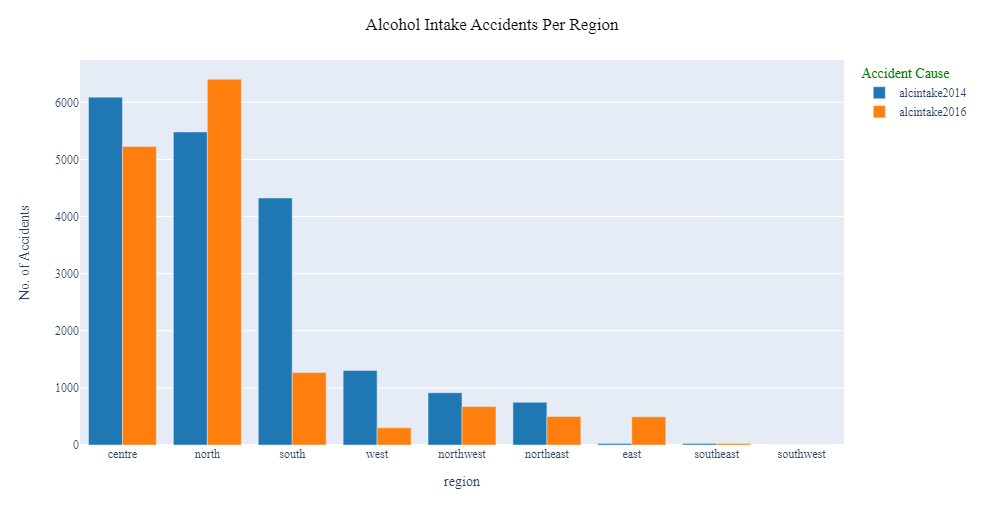

#### 4.1.2. Overspeeding Accidents Per Region

In [42]:
fig_1 = data.groupby("region")[overspeed].sum().sort_values(["overspeed2014"], ascending=False)
fig_1 = px.bar(fig_1, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_1.update_layout(title_text="Overspeeding Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_1.update_xaxes(title_font_family="Times New Roman")

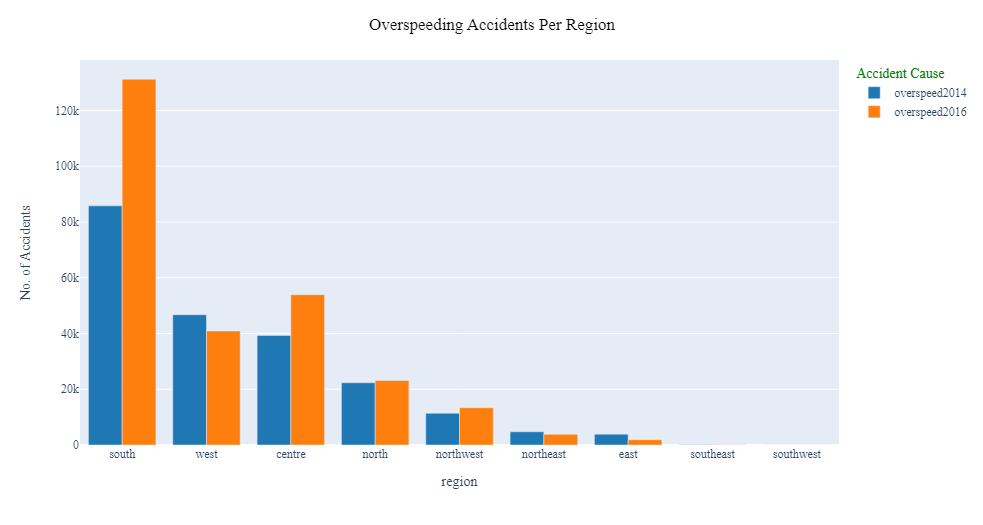

#### 4.1.3. Overtaking Accidents Per Region

In [43]:
fig_2 = data.groupby("region")[overtake].sum().sort_values(["overtaking2014"], ascending=False)
fig_2 = px.bar(fig_2, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_2.update_layout(title_text="Overtaking Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_2.update_xaxes(title_font_family="Times New Roman")

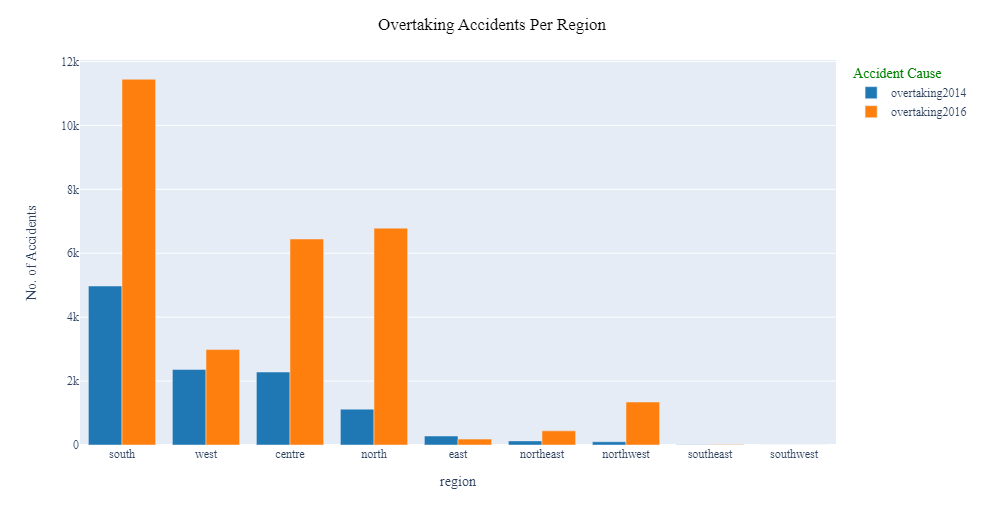

#### 4.1.4. Lane-jumping Accidents Per Region

In [44]:
fig_3 = data.groupby("region")[lanejump].sum().sort_values(["lanejumping2014"], ascending=False)
fig_3 = px.bar(fig_3, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_3.update_layout(title_text="Lane-Jumping Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_3.update_xaxes(title_font_family="Times New Roman")

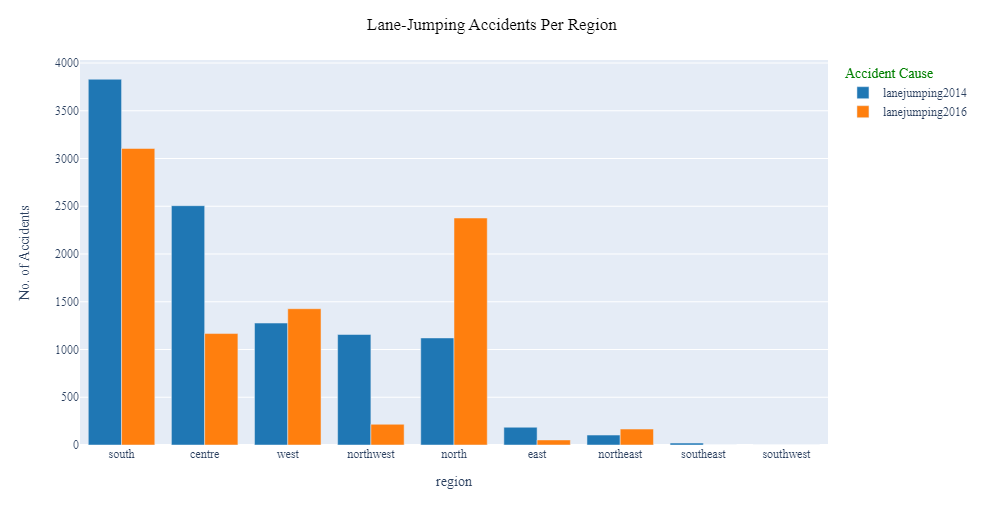

#### 4.1.5. Wrongside Accidents Per Region

In [45]:
fig_4 = data.groupby("region")[wrongside].sum().sort_values(["wrongside2014"], ascending=False)
fig_4 = px.bar(fig_4, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_4.update_layout(title_text="Wrongside Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_4.update_xaxes(title_font_family="Times New Roman")

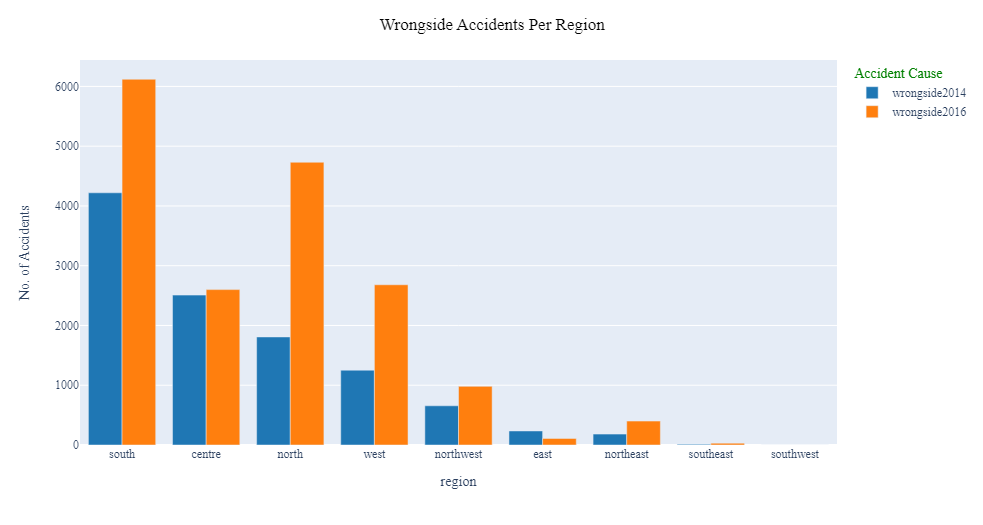

#### 4.1.6. Signal Avoidance Accidents Per Region

In [46]:
fig_5 = data.groupby("region")[signal].sum().sort_values(["signalavoid2014"], ascending=False)
fig_5 = px.bar(fig_5, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_5.update_layout(title_text="Signal Avoidance Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_5.update_xaxes(title_font_family="Times New Roman")

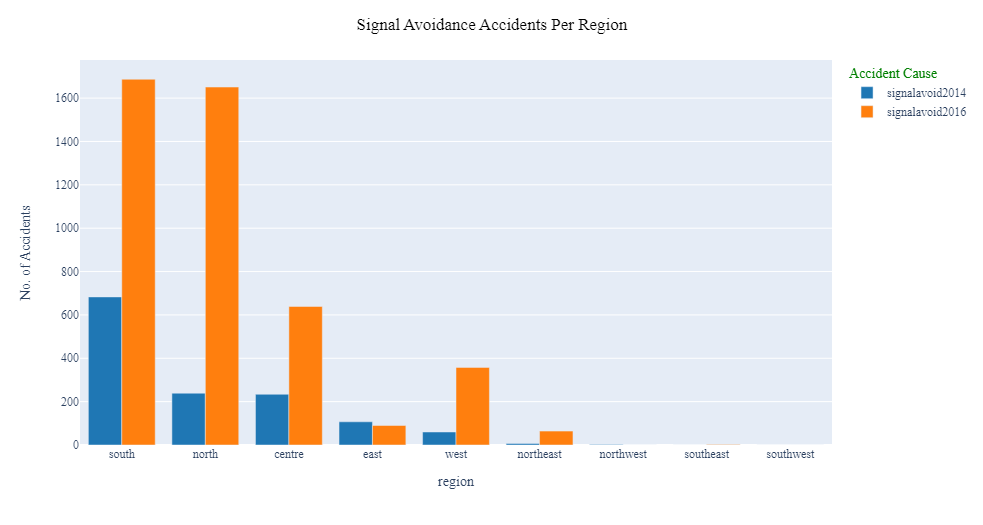

#### 4.1.7. Accidents Caused by Sleep Per Region

In [47]:
fig_6 = data.groupby("region")[asleep].sum().sort_values(["asleep2014"], ascending=False)
fig_6 = px.bar(fig_6, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_6.update_layout(title_text="Sleep Accidents Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_6.update_xaxes(title_font_family="Times New Roman")

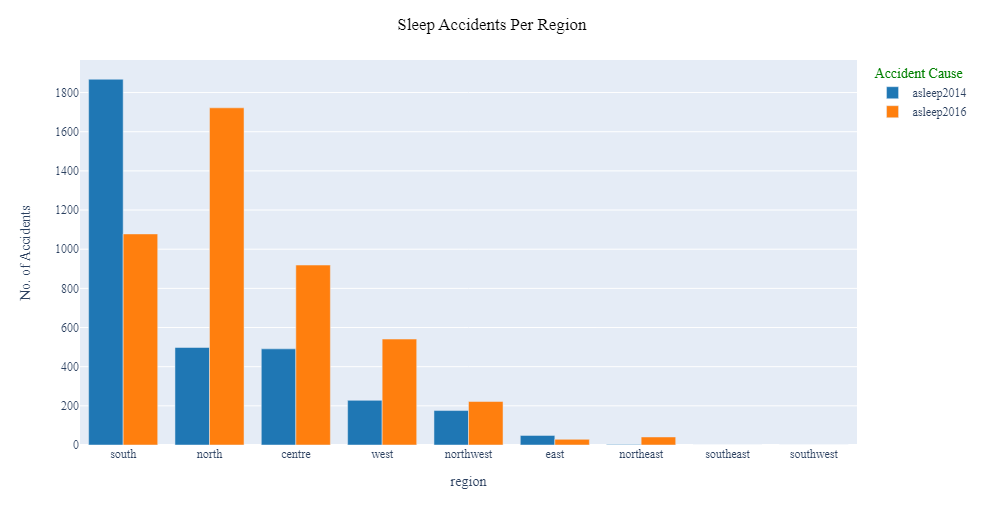

#### 4.1.8. Other Accident Causes Per State

In [48]:
fig_7 = data.groupby("region")[others].sum().sort_values(["othercause2014"], ascending=False)
fig_7 = px.bar(fig_7, barmode="group",
              labels={"value": "No. of Accidents", "variable": "Accident Cause"},
              color_discrete_sequence=px.colors.qualitative.D3)
fig_7.update_layout(title_text="Other Accident Causes Per Region", title_x=0.5,
                   font_family="Times New Roman", title_font_family="Times New Roman", 
                    title_font_color="black", legend_title_font_color="green")
fig_7.update_xaxes(title_font_family="Times New Roman")

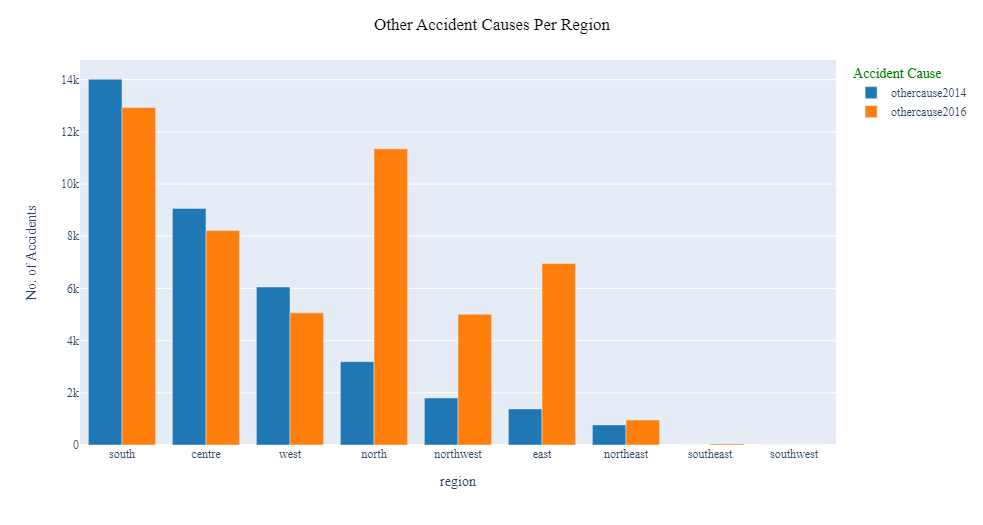

### 4.2. Data Visualisation for Accidents Per Region

- [***choropleth***](https://plotly.com/python/choropleth-maps/) maps are used to visualize accidents per state

#### 4.2.1. 2014 Alcohol Intake Accidents Per State

- The line of code below renders our maps on our default browser and not in the notebook.
- Outputing the choropleth maps in our notebook would significantly increase the size of our notebook.

In [48]:
pio.renderers.default = "browser"

In [52]:
data["alcintake2014Scale"] = np.log10(data["alcintake2014"], where=(data["alcintake2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="alcintake2014Scale",
                  hover_name="stateut",
                   hover_data=["alcintake2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due to Alcohol Intake", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

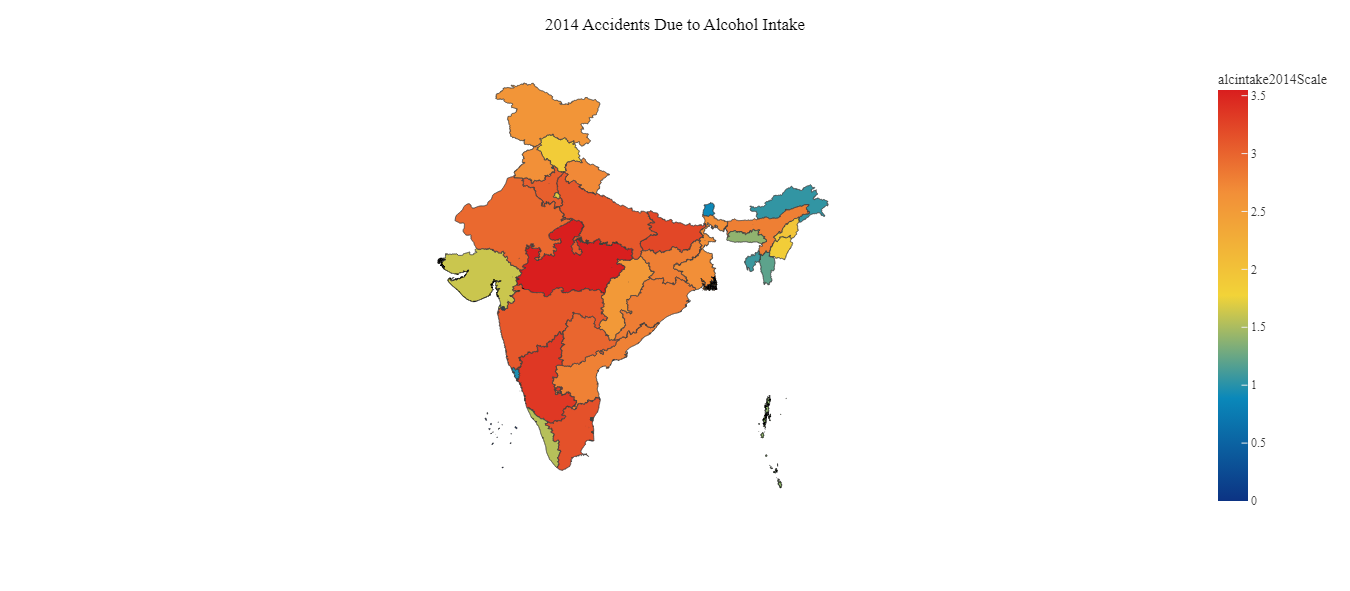

#### 4.2.2. 2016 Alcohol Intake Accidents Per State

In [53]:
data["alcintake2016Scale"] = np.log10(data["alcintake2016"], where=(data["alcintake2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="alcintake2016Scale",
                  hover_name="stateut",
                   hover_data=["alcintake2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due to Alcohol Intake Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

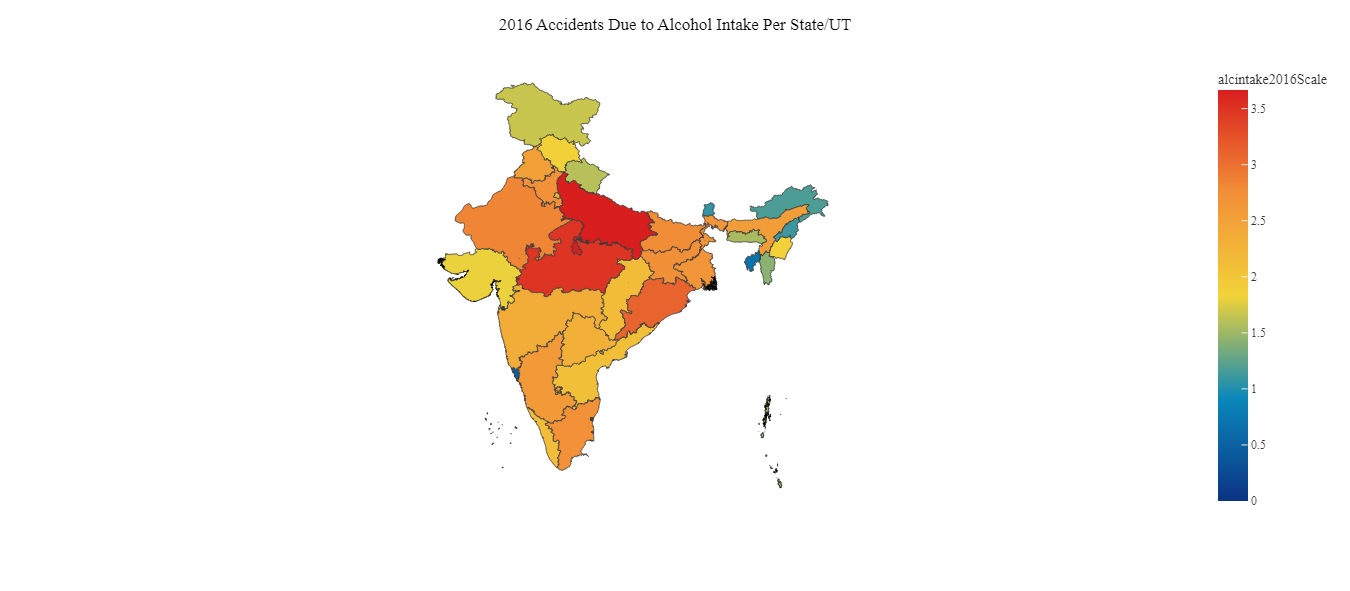

#### 4.2.3. 2014 Overspeeding Accidents Per State

In [54]:
data["overspeed2014Scale"] = np.log10(data["overspeed2014"], where=(data["overspeed2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="overspeed2014Scale",
                  hover_name="stateut",
                   hover_data=["overspeed2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due to Overspeeding Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

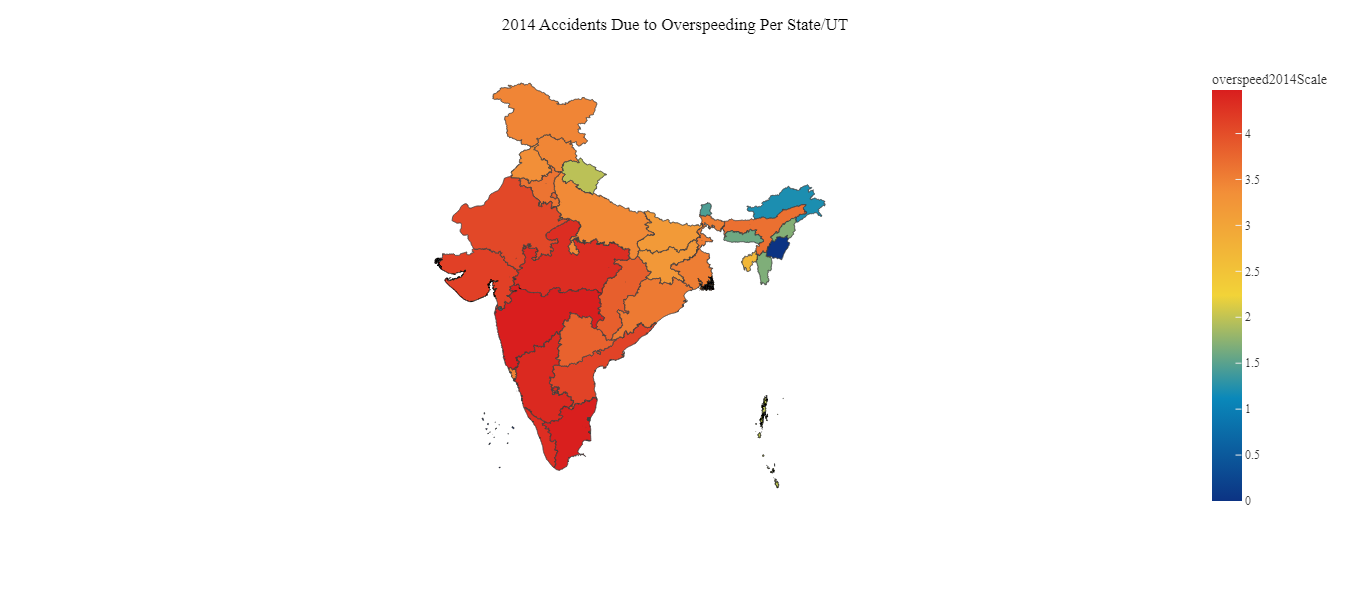

#### 4.2.4. 2016 Overspeeding Accidents Per State

In [55]:
data["overspeed2016Scale"] = np.log10(data["overspeed2016"], where=(data["overspeed2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="overspeed2016Scale",
                  hover_name="stateut",
                   hover_data=["overspeed2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due to Overspeeding Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

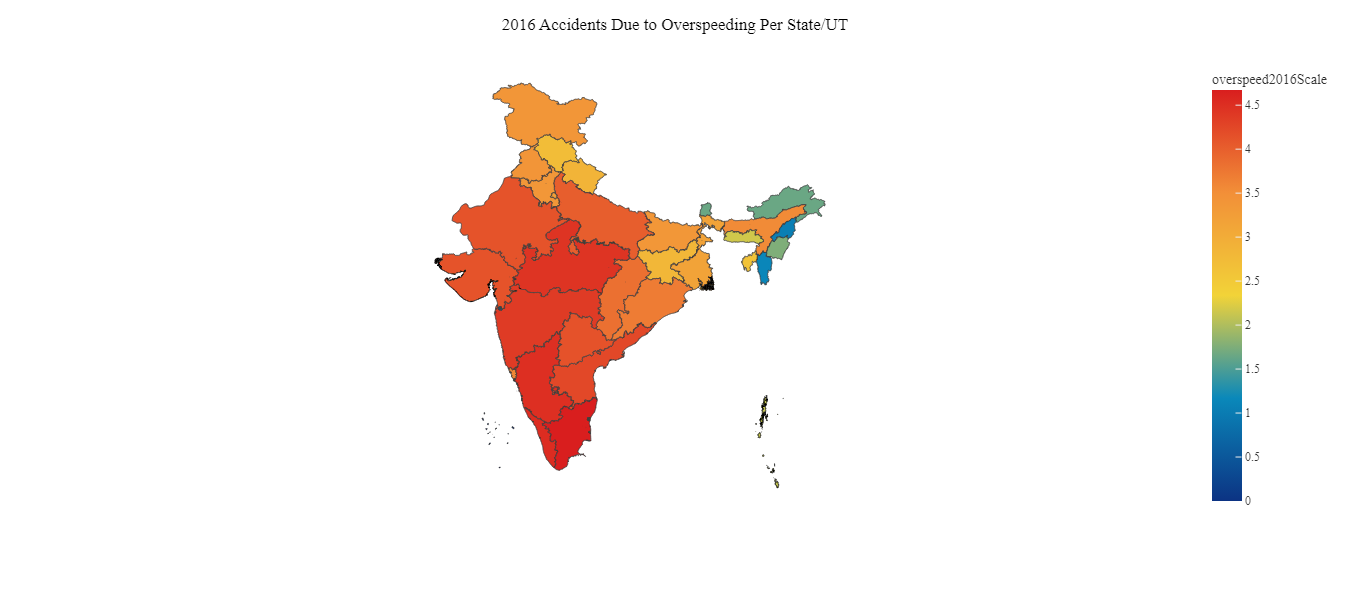

#### 4.2.5. 2014 Overtaking Accidents Per State

In [56]:
data["overtaking2014Scale"] = np.log10(data["overtaking2014"], where=(data["overtaking2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="overtaking2014Scale",
                  hover_name="stateut",
                   hover_data=["overtaking2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due to Overtaking Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

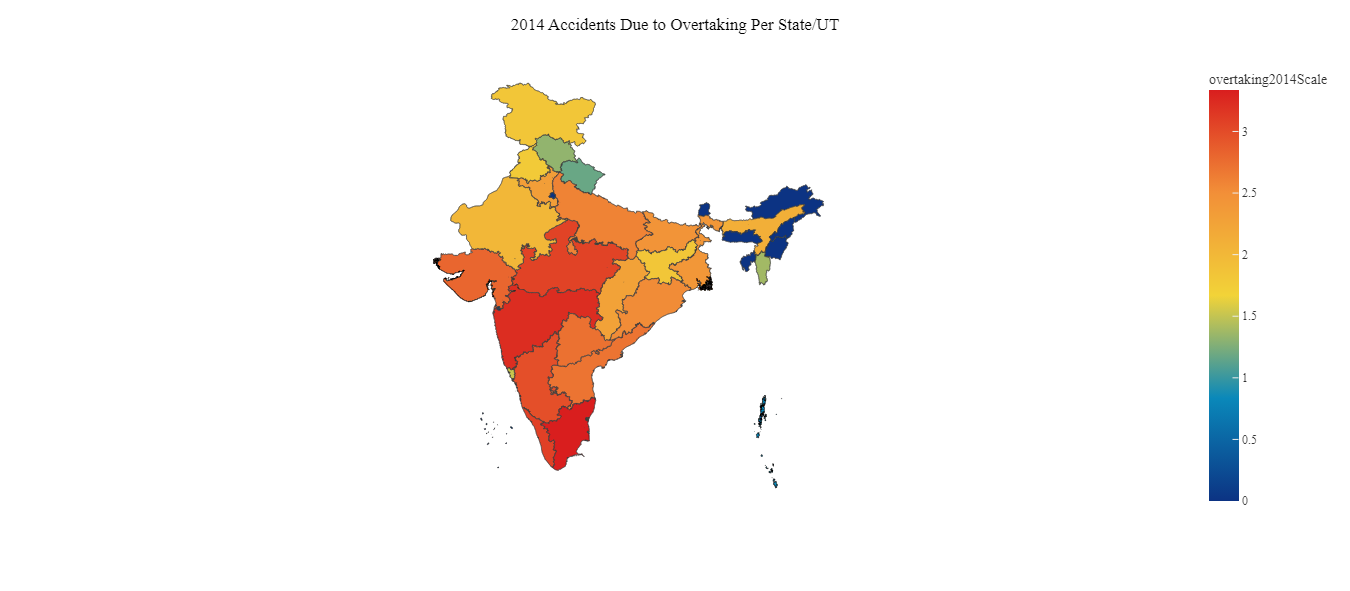

#### 4.2.6. 2016 Overtaking Accidents Per State

In [57]:
data["overtaking2016Scale"] = np.log10(data["overtaking2016"], where=(data["overtaking2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="overtaking2016Scale",
                  hover_name="stateut",
                   hover_data=["overtaking2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due to Overtaking Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

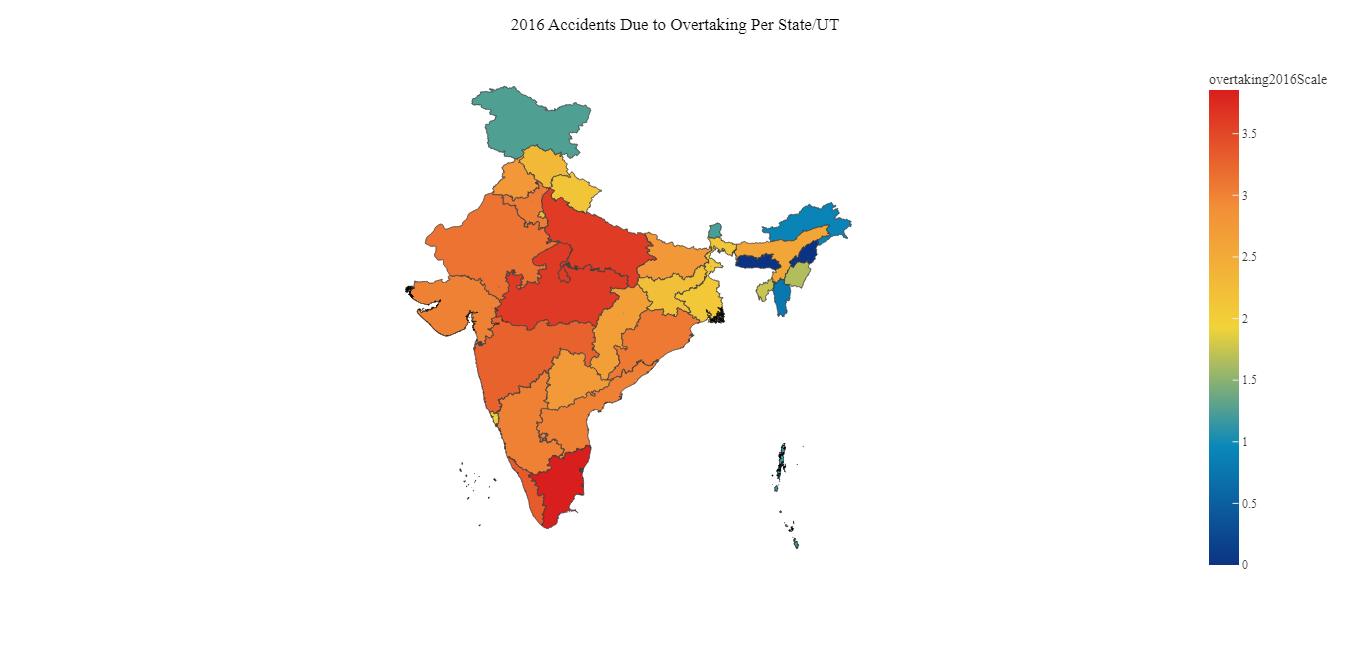

#### 4.2.7. 2014 Lane-Jumping Accidents Per State

In [58]:
data["lanejumping2014Scale"] = np.log10(data["lanejumping2014"], where=(data["lanejumping2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="lanejumping2014Scale",
                  hover_name="stateut",
                   hover_data=["lanejumping2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due to Lane-Jumping Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

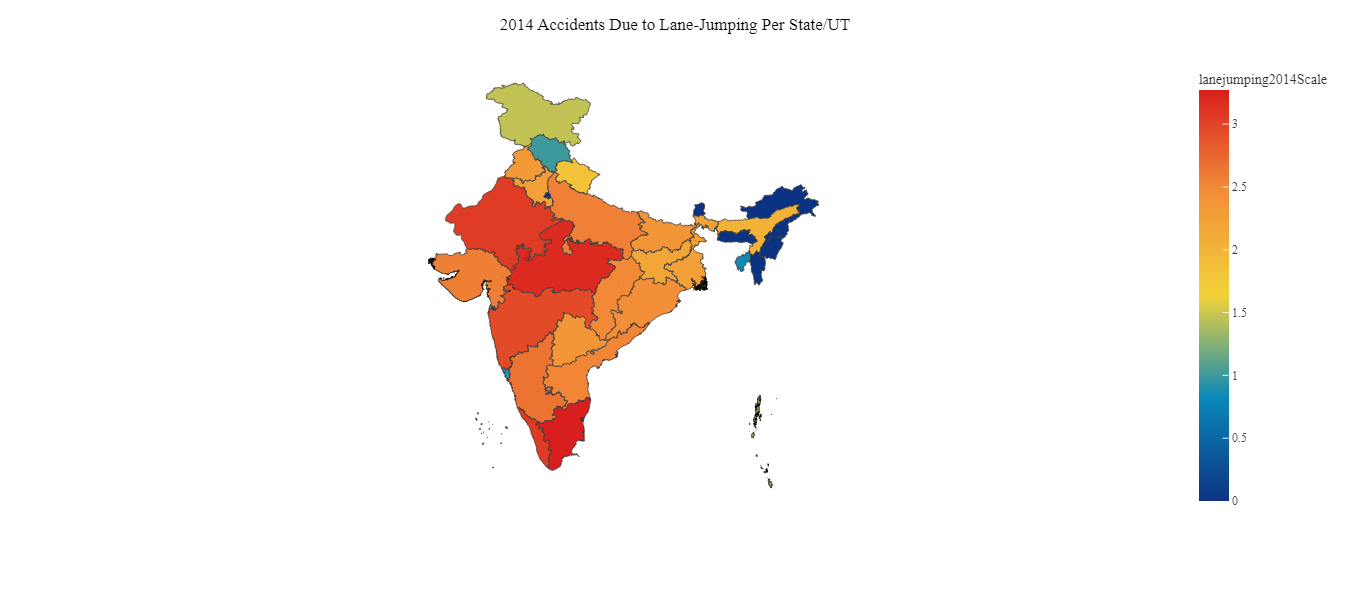

#### 4.2.8. 2016 Lane-Jumping Accidents Per State

In [59]:
data["lanejumping2016Scale"] = np.log10(data["lanejumping2016"], where=(data["lanejumping2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="lanejumping2016Scale",
                  hover_name="stateut",
                   hover_data=["lanejumping2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due to Lane-Jumping Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

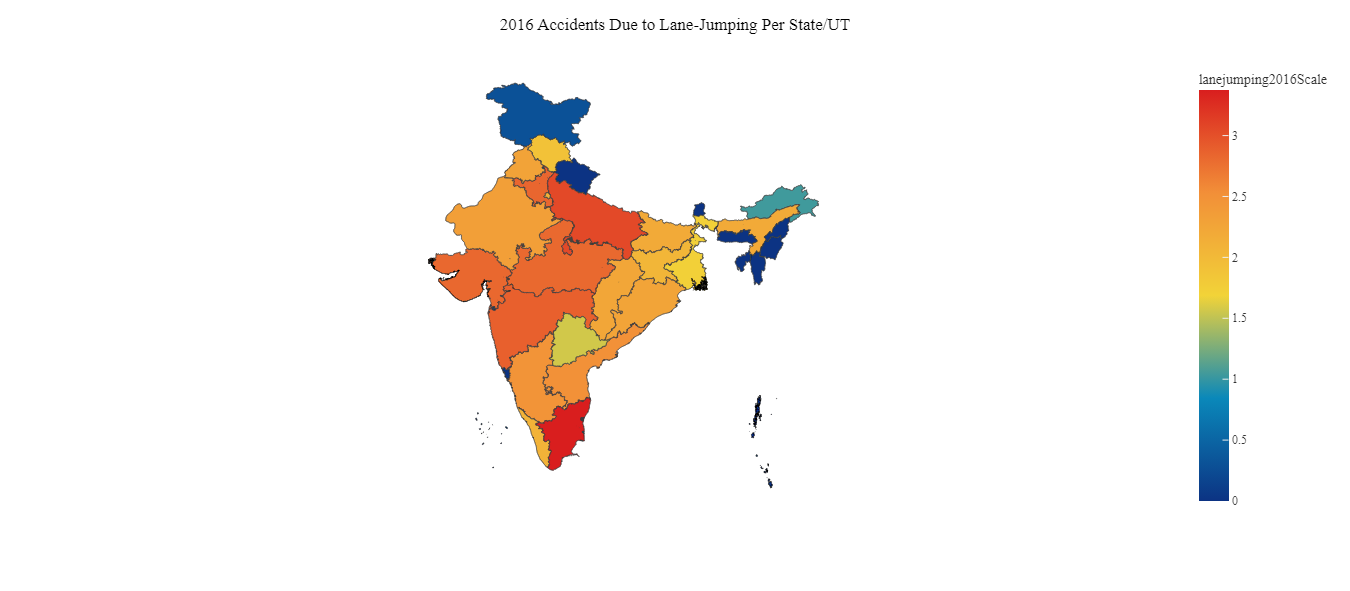

#### 4.2.9. 2014 Wrong-Side Accidents Per State

In [60]:
data["wrongside2014Scale"] = np.log10(data["wrongside2014"], where=(data["wrongside2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="wrongside2014Scale",
                  hover_name="stateut",
                   hover_data=["wrongside2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Wrong-Side Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

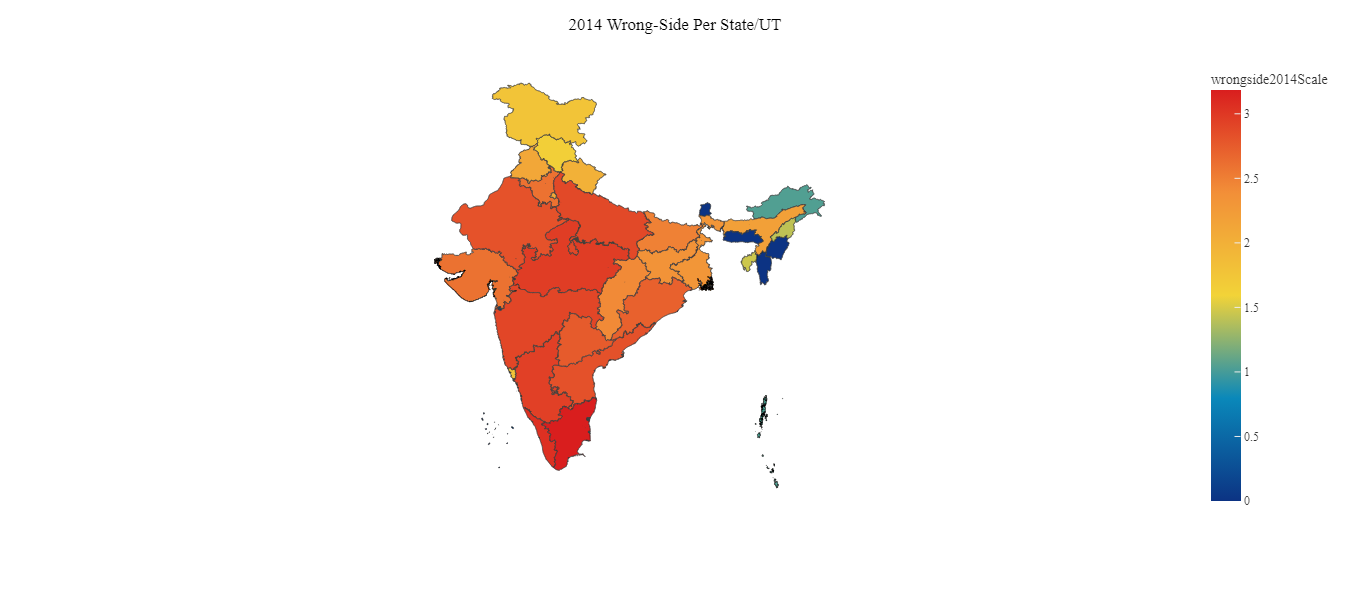

#### 4.2.10. 2016 Wrong-Side Accidents Per State

In [68]:
data["wrongside2016Scale"] = np.log10(data["wrongside2016"], where=(data["wrongside2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="wrongside2016Scale",
                  hover_name="stateut",
                   hover_data=["wrongside2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Wrong-Side Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

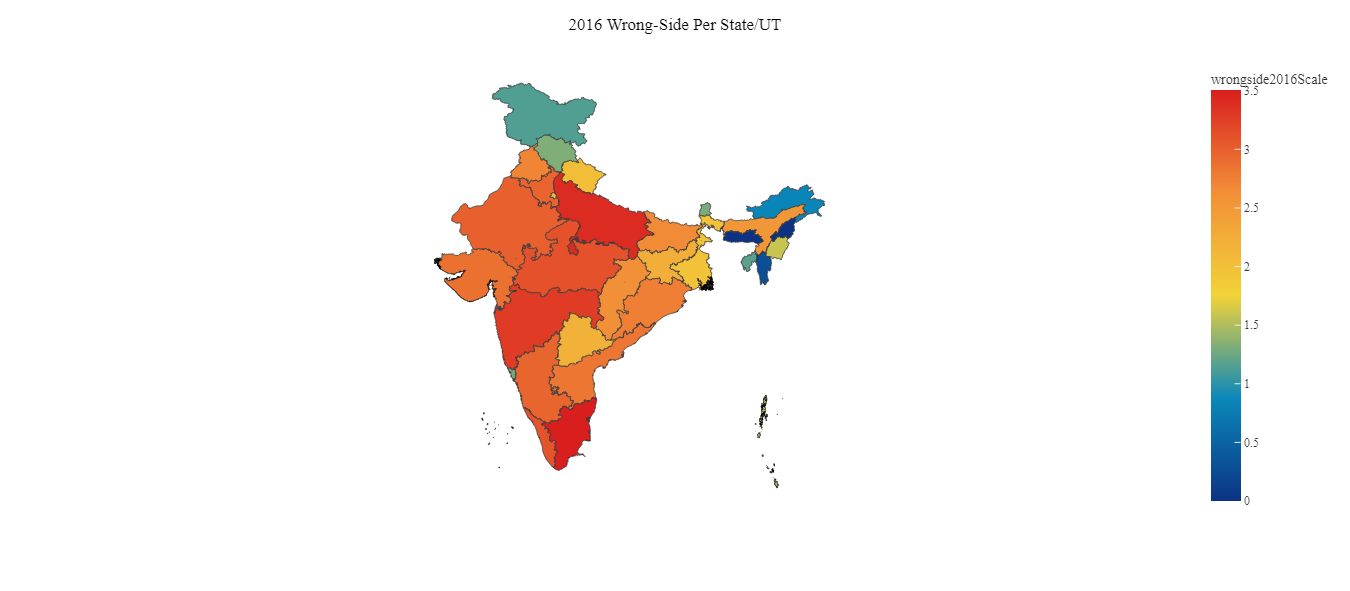

#### 4.2.11. 2014 Signal Avoidance Accidents Per State

In [62]:
data["signalavoid2014Scale"] = np.log10(data["signalavoid2014"], where=(data["signalavoid2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="signalavoid2014Scale",
                  hover_name="stateut",
                   hover_data=["signalavoid2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Signal Avoidance Accidents Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

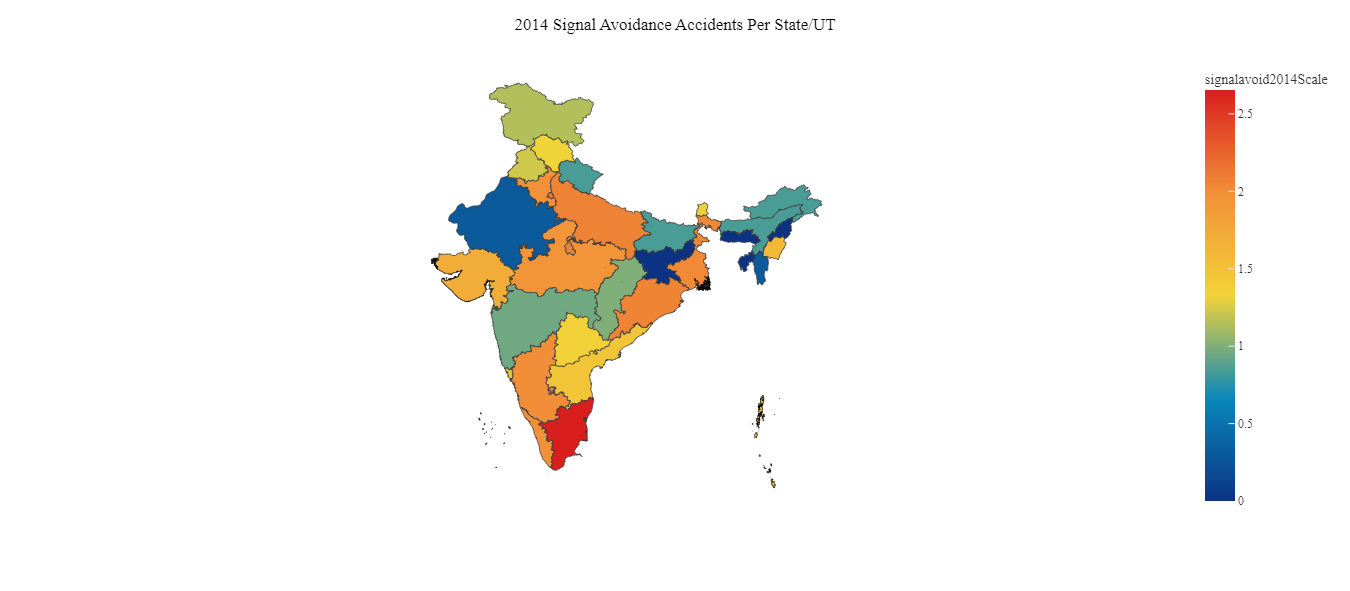

#### 4.2.12. 2016 Signal Avoidance Accidents Per State

In [63]:
data["signalavoid2016Scale"] = np.log10(data["signalavoid2016"], where=(data["signalavoid2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="signalavoid2016Scale",
                  hover_name="stateut",
                   hover_data=["signalavoid2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Signal Avoidance Accidents Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

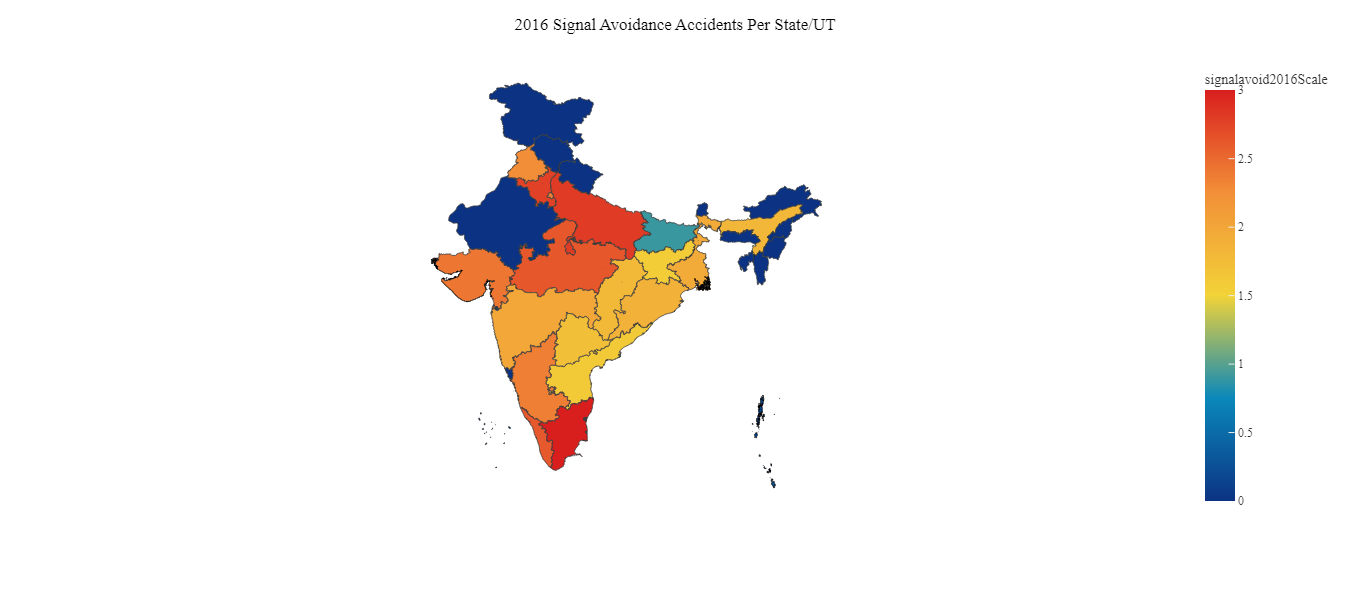

#### 4.2.13. 2014 Accidents Due to Sleep Per State

In [64]:
data["asleep2014Scale"] = np.log10(data["asleep2014"], where=(data["asleep2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="asleep2014Scale",
                  hover_name="stateut",
                   hover_data=["asleep2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due To Sleep Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

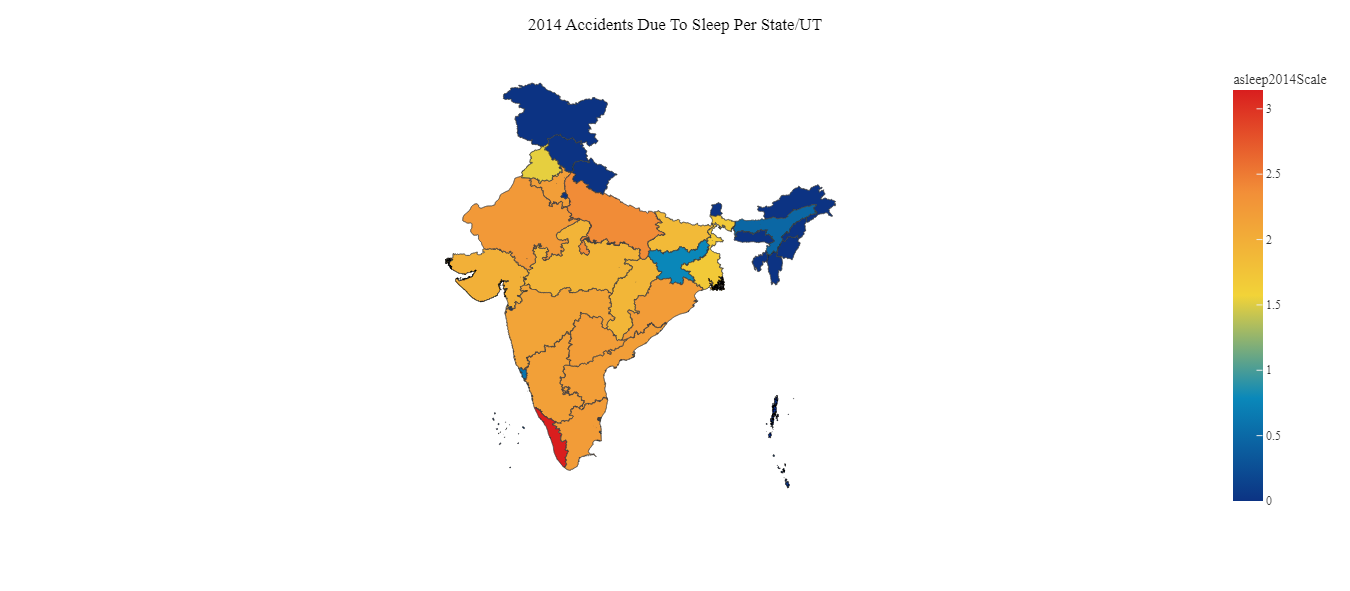

#### 4.2.14. 2016 Accidents Due to Sleep Per State

In [65]:
data["asleep2016Scale"] = np.log10(data["asleep2016"], where=(data["asleep2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="asleep2016Scale",
                  hover_name="stateut",
                   hover_data=["asleep2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due To Sleep Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

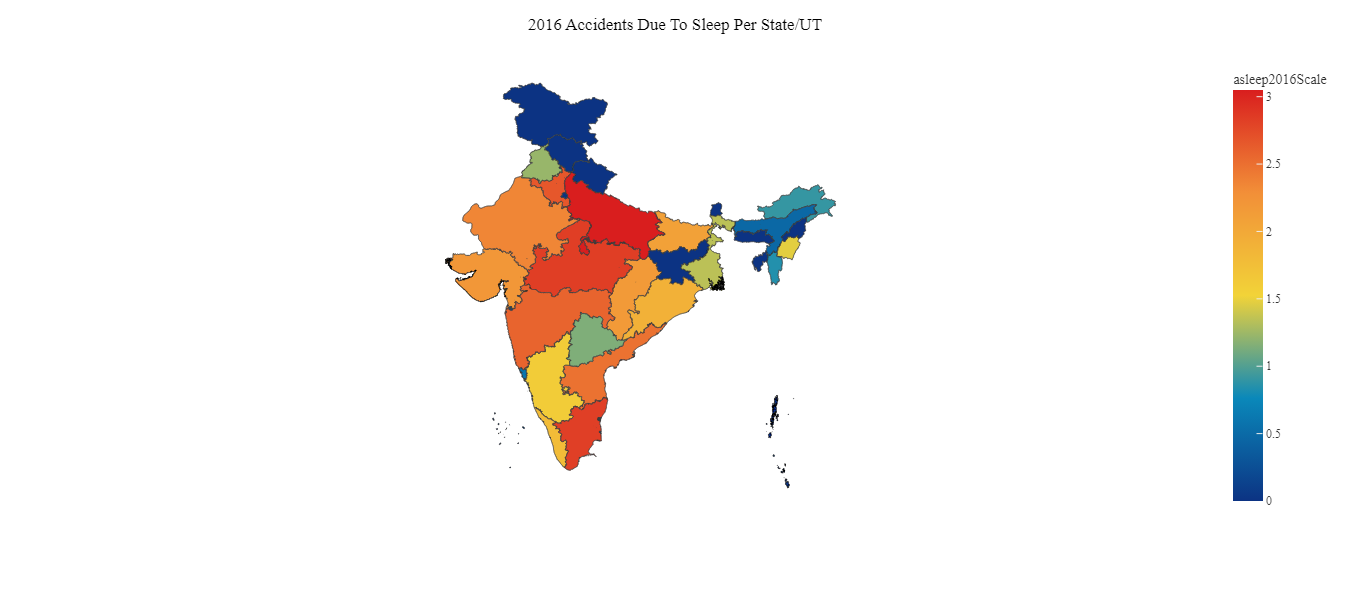

#### 4.2.15. 2014 Accidents Due to Other Causes Per State

In [66]:
data["othercause2014Scale"] = np.log10(data["othercause2014"], where=(data["othercause2014"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="othercause2014Scale",
                  hover_name="stateut",
                   hover_data=["othercause2014"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2014 Accidents Due To Other Causes Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

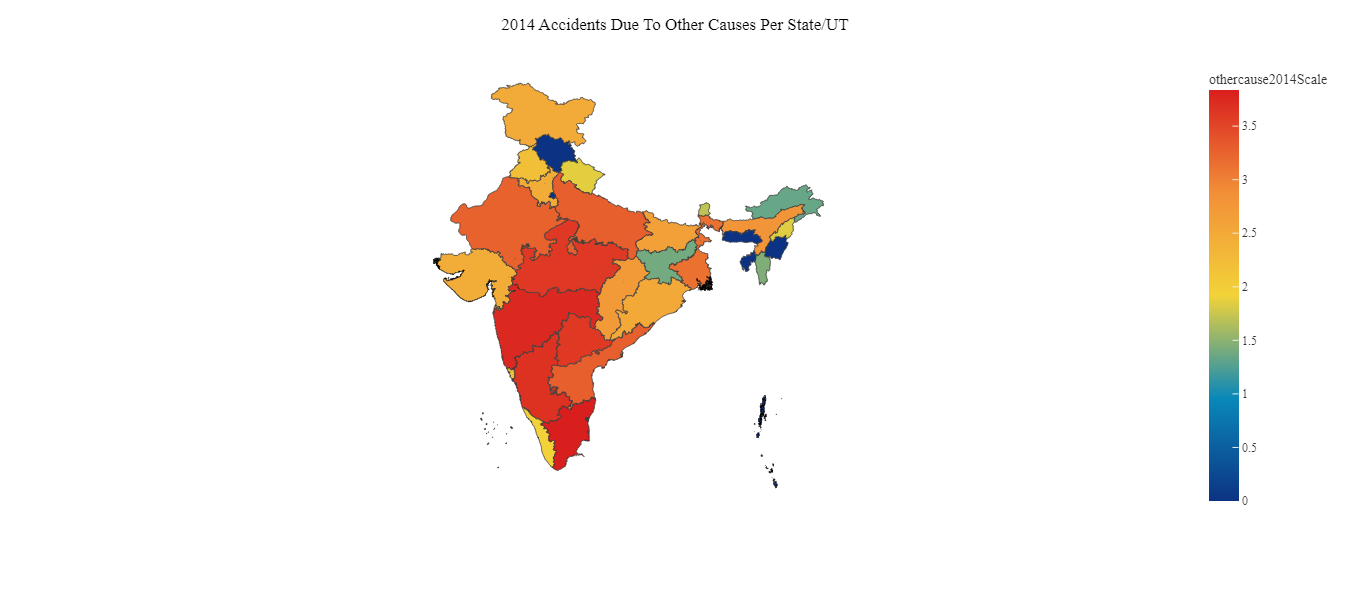

#### 4.2.16. 2016 Accidents Due to Other Causes Per State

In [67]:
data["othercause2016Scale"] = np.log10(data["othercause2016"], where=(data["othercause2016"] != 0))

fig= px.choropleth(data, 
                   locations="stateid", 
                   geojson=india_states, 
                   color="othercause2016Scale",
                  hover_name="stateut",
                   hover_data=["othercause2016"],
                  color_continuous_scale=px.colors.diverging.Portland,
                  template="ggplot2")
fig.update_layout(title_text= "2016 Accidents Due To Other Causes Per State/UT", title_x=0.5,
                  font_family="Times New Roman", title_font_family="Times New Roman",
                  title_font_color="black", legend_title_font_color="green")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

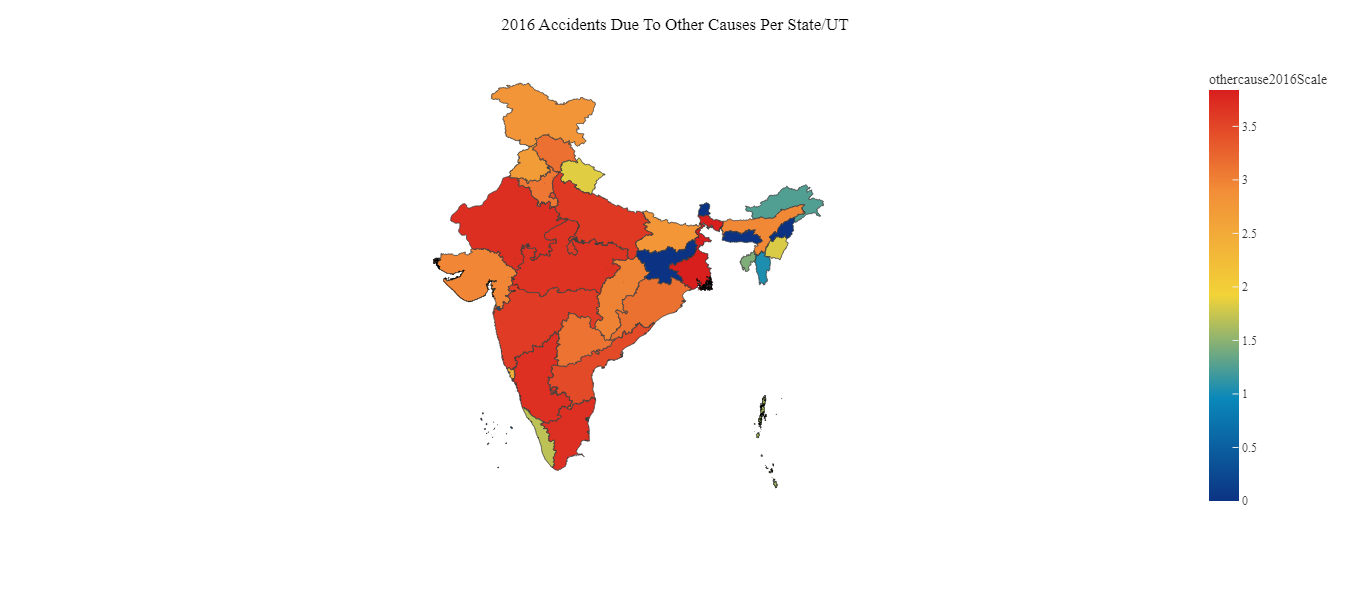

## 5. Actions

### 5.1. Conclusions

- The ***Southern region*** is a hotspot for most accident causes including overspeeding, overtaking, lanejumping, wrong side accidents, signal avoidance, sleep and other causes
- The ***Central and Northern regions*** recorded the highest number of accidents due to alcohol intake
- High number of accidents caused by sleep was also recorded in the ***Northern region***.
- ***Tamil Nadu***, an area in the ***Southern region*** is a hotspot for most accident causes including overspeeding, overtaking, lanejumping, wrong side accidents, signal avoidance and other causes
- ***Madhya Pradesh***, an state in the ***Central Region*** recorded the highest number of accidents due to alcohol intake
- ***Uttar Pradesh***, a state in the ***Northern Region*** recorded the highest number of accidents caused by sleep

### 5.2. Recommendations

- Road networks in ***Southern Region*** areas like ***Tamil Nadu*** plagued with overspeeding accidents should have more speed bumps and speed limit signs added
- Proper road marking and overtaking signage placement in networks with high number of overtaking accidents
- Imposing stiff penalties on road users violating traffic rules
- Installation of cameras along the roads
- Deployment of  more traffic officers with alcohol blowers in ***Central region*** areas like ***Madhya Pradesh*** that are riddled with road accidents due to high alcohol intake
- Creating more awaraness on healthy sleeping habits and the dangers of driving when fatigued in ***Northern region*** areas like ***Uttar Pradesh*** which are affected by accidents due to sleeping drivers.